# Named Entity Recognition (NER) to Get Insights on Road Accidents in Bangladesh

Demo Code, Diana Roccaro, 11/07/2021

# Importing the Required Libraries

In [2]:
import pandas as pd
import numpy as np

# Loading the Scraped News Article Dataframe

In [3]:
# here: I just manually created a little excel table, by copy-pasting 5 news articles from https://www.thedailystar.net/ ...

RoadSafetyNews = pd.read_excel('BangladeshRoadAccNewsDf.xlsx')

In [4]:
RoadSafetyNews

,PubDate,Title,Article,URL
0,"Sun May 3, 2020 05:15 PM",Road accidents kill 211 in 30 days of shutdown...,At least 211 people were killed in road accide...,https://www.thedailystar.net/bangladesh-road-a...
1,"Mon Nov 2, 2020 12:54 PM",Two die in truck-covered van collision in Sira...,Two people were killed and two others were inj...,https://www.thedailystar.net/road-accident-in-...
2,"Mon Jan 11, 2021 12:18 PM",2 killed as train hits motorcycle in Thakurgaon,Two people were killed as a Dhaka-bound train ...,https://www.thedailystar.net/online/2-killed-a...
3,"Wed Feb 10, 2021 05:15 PM",Road accident: Bus-truck collision leaves 11 d...,Eleven people were killed and 13 others injure...,https://www.thedailystar.net/road-accident-bus...
4,"Mon Mar 8, 2021 05:47 PM",Man dies after truck crashes into motorcycle i...,A man was killed in a road accident this morni...,https://www.thedailystar.net/man-dies-after-tr...


In [5]:
RoadSafetyNews.shape

(5, 4)

# Look at an Example Text -> How much Cleaning Required?

In [6]:
RoadSafetyNews.Article[0]

'At least 211 people were killed in road accidents across the country in one month of the ongoing shutdown enforced to contain the spread of coronavirus. Bangladesh Jatri Kalyan Samity, a passenger welfare platform, today revealed the information prepared by analysing reports published in daily newspapers across the country. Despite a nationwide shutdown since March 26, at least 211 people have been killed and 227 injured in 201 road accidents in the first month of the closure, it said in a press release. At the same time, eight people were killed, two injured and two others went missing in eight accidents on waterways of the country, the statement said. "General closure or lockdowns can\'t seem to be able to stop road accidents," the organisation observed.'

# SIJ'S AMAZING CLEANING FUNCTION (SIJUADE OGUNTAYO, Lead ML Eng & more at Omdena)

In [ ]:
# special thanks to my dear friend Sijuade for speeding up things :)

In [7]:
! pip install cleantext

In [8]:
from cleantext import clean
import nltk

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
# from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

In [12]:
RoadSafetyNews.head()

,PubDate,Title,Article,URL
0,"Sun May 3, 2020 05:15 PM",Road accidents kill 211 in 30 days of shutdown...,At least 211 people were killed in road accide...,https://www.thedailystar.net/bangladesh-road-a...
1,"Mon Nov 2, 2020 12:54 PM",Two die in truck-covered van collision in Sira...,Two people were killed and two others were inj...,https://www.thedailystar.net/road-accident-in-...
2,"Mon Jan 11, 2021 12:18 PM",2 killed as train hits motorcycle in Thakurgaon,Two people were killed as a Dhaka-bound train ...,https://www.thedailystar.net/online/2-killed-a...
3,"Wed Feb 10, 2021 05:15 PM",Road accident: Bus-truck collision leaves 11 d...,Eleven people were killed and 13 others injure...,https://www.thedailystar.net/road-accident-bus...
4,"Mon Mar 8, 2021 05:47 PM",Man dies after truck crashes into motorcycle i...,A man was killed in a road accident this morni...,https://www.thedailystar.net/man-dies-after-tr...


In [13]:
RoadSafetyNews.Article[0]

'At least 211 people were killed in road accidents across the country in one month of the ongoing shutdown enforced to contain the spread of coronavirus. Bangladesh Jatri Kalyan Samity, a passenger welfare platform, today revealed the information prepared by analysing reports published in daily newspapers across the country. Despite a nationwide shutdown since March 26, at least 211 people have been killed and 227 injured in 201 road accidents in the first month of the closure, it said in a press release. At the same time, eight people were killed, two injured and two others went missing in eight accidents on waterways of the country, the statement said. "General closure or lockdowns can\'t seem to be able to stop road accidents," the organisation observed.'

# Join all abstract texts to create WordCloud

In [14]:
# join the article texts one after another:

all_texts = ''
for text in RoadSafetyNews.Article.dropna():
  all_texts += text

In [15]:
all_texts

'At least 211 people were killed in road accidents across the country in one month of the ongoing shutdown enforced to contain the spread of coronavirus. Bangladesh Jatri Kalyan Samity, a passenger welfare platform, today revealed the information prepared by analysing reports published in daily newspapers across the country. Despite a nationwide shutdown since March 26, at least 211 people have been killed and 227 injured in 201 road accidents in the first month of the closure, it said in a press release. At the same time, eight people were killed, two injured and two others went missing in eight accidents on waterways of the country, the statement said. "General closure or lockdowns can\'t seem to be able to stop road accidents," the organisation observed.Two people were killed and two others were injured in a head-on collision between a truck and a covered van in Tarash upazila of Sirajganj early today. The deceased were identified as Md Nobi, 30, driver of covered van, and Johurul I

In [16]:
len(all_texts)

3986

In [17]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
#import pandas as pd 

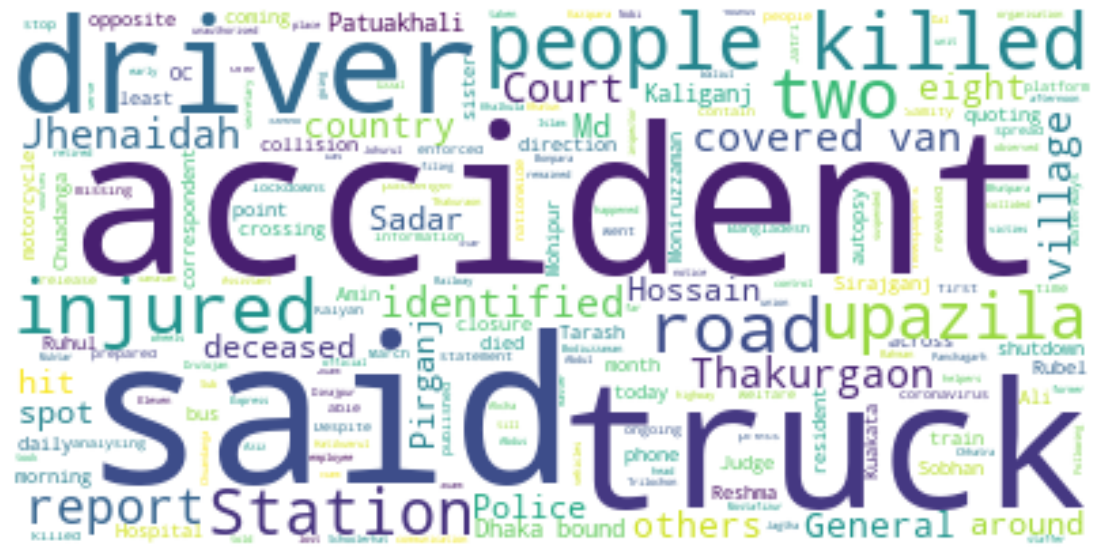

In [18]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000,
               contour_width=3, contour_color='yellow')      # stopwords=stopwords, contour_color='firebrick'

# Generate a wordcloud
wc.generate(all_texts)

# store to file
wc.to_file("RoadAccNewsArticles.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
def clean_text(text):
  return(clean(text, all=False, extra_spaces=True, stemming=False, 
               stopwords=True, numbers=False, punct=True, lowercase=True, 
               stp_lang='english'))

In [20]:
RoadSafetyNews["Cleaned_Article"] = RoadSafetyNews['Article'].map(lambda x: clean_text(x))

In [21]:
RoadSafetyNews.head()

,PubDate,Title,Article,URL,Cleaned_Article
0,"Sun May 3, 2020 05:15 PM",Road accidents kill 211 in 30 days of shutdown...,At least 211 people were killed in road accide...,https://www.thedailystar.net/bangladesh-road-a...,least 211 people killed road accidents across ...
1,"Mon Nov 2, 2020 12:54 PM",Two die in truck-covered van collision in Sira...,Two people were killed and two others were inj...,https://www.thedailystar.net/road-accident-in-...,two people killed two others injured headon co...
2,"Mon Jan 11, 2021 12:18 PM",2 killed as train hits motorcycle in Thakurgaon,Two people were killed as a Dhaka-bound train ...,https://www.thedailystar.net/online/2-killed-a...,two people killed dhakabound train hit motorcy...
3,"Wed Feb 10, 2021 05:15 PM",Road accident: Bus-truck collision leaves 11 d...,Eleven people were killed and 13 others injure...,https://www.thedailystar.net/road-accident-bus...,eleven people killed 13 others injured collisi...
4,"Mon Mar 8, 2021 05:47 PM",Man dies after truck crashes into motorcycle i...,A man was killed in a road accident this morni...,https://www.thedailystar.net/man-dies-after-tr...,man killed road accident morning truck hit mot...


In [22]:
# join the article texts one after another:

all_cleaned_texts = ''
for text in RoadSafetyNews.Cleaned_Article.dropna():
  all_cleaned_texts += text

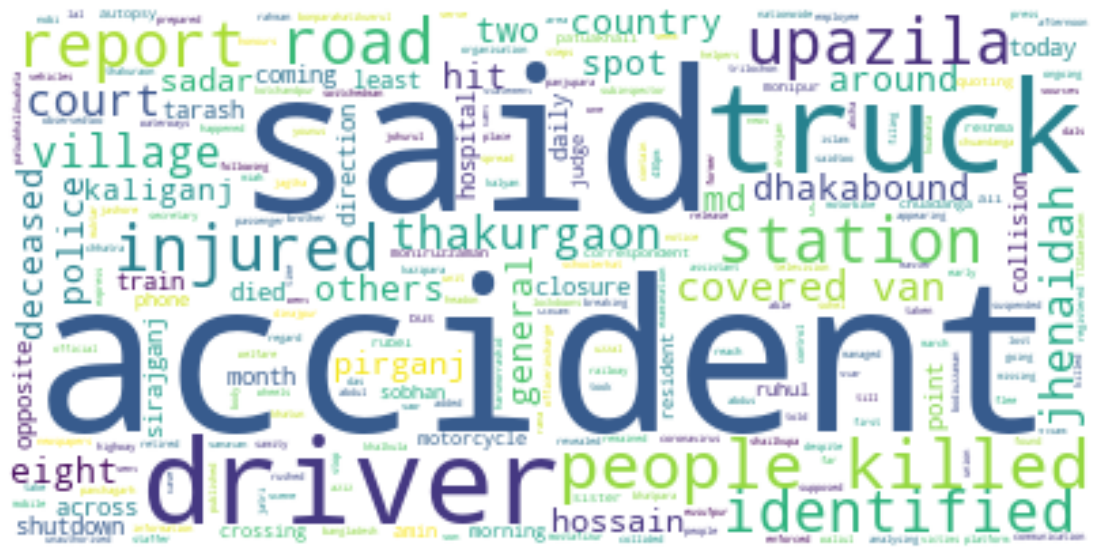

In [23]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000,
               contour_width=3, contour_color='yellow')      # stopwords=stopwords, contour_color='firebrick'

# Generate a wordcloud
wc.generate(all_cleaned_texts)

# store to file
wc.to_file("RoadAccCleanedNewsArticles.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [24]:
from google.colab import files

RoadSafetyNews.to_csv('RoadSafetyNews.csv')
files.download('RoadSafetyNews.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Named Entity Recognition using Spacy & Displacy

In [ ]:
# https://towardsdatascience.com/named-entity-recognition-with-nltk-and-spacy-8c4a7d88e7da

In [25]:
from collections import Counter

In [26]:
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint

In [27]:
import spacy
from spacy import displacy
from spacy.matcher import Matcher
from spacy.matcher import PhraseMatcher

import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Regular expression library already included in python :)
import re    

In [28]:
nlp = spacy.load('en_core_web_sm')

# NER on One Example Article Text (Spacy & Displacy)

In [29]:
RoadSafetyNews.Article[0]

'At least 211 people were killed in road accidents across the country in one month of the ongoing shutdown enforced to contain the spread of coronavirus. Bangladesh Jatri Kalyan Samity, a passenger welfare platform, today revealed the information prepared by analysing reports published in daily newspapers across the country. Despite a nationwide shutdown since March 26, at least 211 people have been killed and 227 injured in 201 road accidents in the first month of the closure, it said in a press release. At the same time, eight people were killed, two injured and two others went missing in eight accidents on waterways of the country, the statement said. "General closure or lockdowns can\'t seem to be able to stop road accidents," the organisation observed.'

In [30]:
doc = nlp(RoadSafetyNews.Article[0])
len(doc.ents)

14

In [31]:
labels = [x.label_ for x in doc.ents]
Counter(labels)

Counter({'CARDINAL': 8, 'DATE': 5, 'PERSON': 1})

In [32]:
pprint([(X.text, X.label_) for X in doc.ents])

[('At least 211', 'CARDINAL'),
 ('one month', 'DATE'),
 ('Bangladesh Jatri Kalyan Samity', 'PERSON'),
 ('today', 'DATE'),
 ('daily', 'DATE'),
 ('March 26', 'DATE'),
 ('at least 211', 'CARDINAL'),
 ('227', 'CARDINAL'),
 ('201', 'CARDINAL'),
 ('the first month', 'DATE'),
 ('eight', 'CARDINAL'),
 ('two', 'CARDINAL'),
 ('two', 'CARDINAL'),
 ('eight', 'CARDINAL')]


In [33]:
displacy.render(doc, jupyter=True, style="ent")

# SPARK NLP (to Speed Up Things?)

Installing Spark

In [34]:
import os

# Install java
! apt-get update -qq
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! java -version

# Install pyspark
! pip install --ignore-installed -q pyspark==2.4.4
! pip install --ignore-installed -q spark-nlp==2.6.3-rc1

openjdk version "1.8.0_292"
OpenJDK Runtime Environment (build 1.8.0_292-8u292-b10-0ubuntu1~18.04-b10)
OpenJDK 64-Bit Server VM (build 25.292-b10, mixed mode)
     |████████████████████████████████| 215.7MB 67kB/s 
     |████████████████████████████████| 204kB 16.4MB/s 
     |████████████████████████████████| 133kB 5.0MB/s 


In [35]:
import sparknlp

spark = sparknlp.start()

# params =>> gpu=False, spark23=False (start with spark 2.3)

print("Spark NLP version", sparknlp.version())

print("Apache Spark version:", spark.version)

Spark NLP version 2.6.3-rc1
Apache Spark version: 2.4.4


Converting Pandas Dataframe to a Spark Dataframe

In [36]:
RoadSafetyNews

,PubDate,Title,Article,URL,Cleaned_Article
0,"Sun May 3, 2020 05:15 PM",Road accidents kill 211 in 30 days of shutdown...,At least 211 people were killed in road accide...,https://www.thedailystar.net/bangladesh-road-a...,least 211 people killed road accidents across ...
1,"Mon Nov 2, 2020 12:54 PM",Two die in truck-covered van collision in Sira...,Two people were killed and two others were inj...,https://www.thedailystar.net/road-accident-in-...,two people killed two others injured headon co...
2,"Mon Jan 11, 2021 12:18 PM",2 killed as train hits motorcycle in Thakurgaon,Two people were killed as a Dhaka-bound train ...,https://www.thedailystar.net/online/2-killed-a...,two people killed dhakabound train hit motorcy...
3,"Wed Feb 10, 2021 05:15 PM",Road accident: Bus-truck collision leaves 11 d...,Eleven people were killed and 13 others injure...,https://www.thedailystar.net/road-accident-bus...,eleven people killed 13 others injured collisi...
4,"Mon Mar 8, 2021 05:47 PM",Man dies after truck crashes into motorcycle i...,A man was killed in a road accident this morni...,https://www.thedailystar.net/man-dies-after-tr...,man killed road accident morning truck hit mot...


In [37]:
RoadSafetyNews_4spark = RoadSafetyNews.rename(columns={"Article": "text"})

In [38]:
RoadSafetyNews_4spark_spark_df = spark.createDataFrame(RoadSafetyNews_4spark)

In [39]:
RoadSafetyNews_4spark_spark_df

DataFrame[PubDate: string, Title: string, text: string, URL: string, Cleaned_Article: string]

In [40]:
spark_df = RoadSafetyNews_4spark_spark_df

In [41]:
from sparknlp.base import *

documentAssembler = DocumentAssembler()\
.setInputCol("text")\
.setOutputCol("document")\
.setCleanupMode("shrink")

doc_df = documentAssembler.transform(spark_df)

doc_df.show(truncate=30)

+-------------------------+------------------------------+------------------------------+------------------------------+------------------------------+------------------------------+
|                  PubDate|                         Title|                          text|                           URL|               Cleaned_Article|                      document|
+-------------------------+------------------------------+------------------------------+------------------------------+------------------------------+------------------------------+
| Sun May 3, 2020 05:15 PM|Road accidents kill 211 in ...|At least 211 people were ki...|https://www.thedailystar.ne...|least 211 people killed roa...|[[document, 0, 764, At leas...|
| Mon Nov 2, 2020 12:54 PM|Two die in truck-covered va...|Two people were killed and ...|https://www.thedailystar.ne...|two people killed two other...|[[document, 0, 746, Two peo...|
|Mon Jan 11, 2021 12:18 PM|2 killed as train hits moto...|Two people were killed as a

# NER USING SPARK NLP

In [42]:
from pyspark.ml import Pipeline
from sparknlp.annotator import *
from sparknlp.common import *
from sparknlp.base import *

In [43]:
from sparknlp.training import CoNLL
import pyspark.sql.functions as F

### Public NER (CoNLL 2003)

<p><strong>Named-Entity recognition</strong> is a well-known technique in information extraction it is also known as&nbsp;<strong>entity identification</strong>,&nbsp;<strong>entity chunking</strong>&nbsp;and&nbsp;<strong>entity extraction.</strong>&nbsp;Knowing the relevant tags for each article help in automatically categorizing the articles in defined hierarchies and enable smooth content discovery. 

Entities

``` PERSON, LOCATION, ORGANIZATION, MISC ```

In [44]:
public_ner = NerDLModel.pretrained("ner_dl", 'en') \
          .setInputCols(["document", "token", "embeddings"]) \
          .setOutputCol("ner")

ner_dl download started this may take some time.
Approximate size to download 13.6 MB
[OK!]


In [45]:
public_ner.getClasses()

['O', 'B-ORG', 'B-LOC', 'B-PER', 'I-PER', 'I-ORG', 'B-MISC', 'I-LOC', 'I-MISC']

In [46]:
documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

tokenizer = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token")

# ner_dl model is trained with glove_100d. So we use the same embeddings in the pipeline
glove_embeddings = WordEmbeddingsModel.pretrained('glove_100d').\
  setInputCols(["document", 'token']).\
  setOutputCol("embeddings")

nlpPipeline = Pipeline(stages=[
 documentAssembler, 
 tokenizer,
 glove_embeddings,
 public_ner
 ])

empty_df = spark.createDataFrame([['']]).toDF("text")

pipelineModel = nlpPipeline.fit(empty_df)


glove_100d download started this may take some time.
Approximate size to download 145.3 MB
[OK!]


In [47]:
result = pipelineModel.transform(spark_df)

In [48]:
result = pipelineModel.transform(spark_df.limit(10))   

result_df = result.select(F.explode(F.arrays_zip('token.result', 'ner.result')).alias("cols")) \
.select(F.expr("cols['0']").alias("token"),
        F.expr("cols['1']").alias("ner_label"))

result_df.show(50, truncate=100)



+-----------+---------+
|      token|ner_label|
+-----------+---------+
|         At|        O|
|      least|        O|
|        211|        O|
|     people|        O|
|       were|        O|
|     killed|        O|
|         in|        O|
|       road|        O|
|  accidents|        O|
|     across|        O|
|        the|        O|
|    country|        O|
|         in|        O|
|        one|        O|
|      month|        O|
|         of|        O|
|        the|        O|
|    ongoing|        O|
|   shutdown|        O|
|   enforced|        O|
|         to|        O|
|    contain|        O|
|        the|        O|
|     spread|        O|
|         of|        O|
|coronavirus|        O|
|          .|        O|
| Bangladesh|    B-ORG|
|      Jatri|    I-ORG|
|     Kalyan|    I-ORG|
|     Samity|    I-ORG|
|          ,|        O|
|          a|        O|
|  passenger|        O|
|    welfare|        O|
|   platform|        O|
|          ,|        O|
|      today|        O|
|   revealed|   

### Getting the NER chunks with NER Converter -using the pretrained 'bert_base_cased' NER model

In [50]:
documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

tokenizer = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token")

bert_embeddings = BertEmbeddings.pretrained('bert_base_cased')\
          .setInputCols(["document", "token"])\
          .setOutputCol("embeddings")

onto_ner_bert = NerDLModel.pretrained("ner_dl_bert", 'en') \
          .setInputCols(["document", "token", "embeddings"]) \
          .setOutputCol("ner")

onto_ner_bert.getStorageRef()

nlpPipeline = Pipeline(stages=[
 documentAssembler, 
 tokenizer,
 bert_embeddings,
 onto_ner_bert
 ])

empty_df = spark.createDataFrame([['']]).toDF("text")

pipelineModel = nlpPipeline.fit(empty_df)

bert_base_cased download started this may take some time.
Approximate size to download 389.1 MB
[OK!]
ner_dl_bert download started this may take some time.
Approximate size to download 15.4 MB
[OK!]


In [51]:

ner_converter = NerConverter() \
  .setInputCols(["document", "token", "ner"]) \
  .setOutputCol("ner_chunk")



nlpPipeline = Pipeline(stages=[
 documentAssembler, 
 tokenizer,
 bert_embeddings,
 onto_ner_bert,
 ner_converter
 ])

# empty_df = spark.createDataFrame([['']]).toDF("text")

pipelineModel = nlpPipeline.fit(spark_df)

result = pipelineModel.transform(spark_df)   #.limit(10)



In [52]:
result.select(F.explode(F.arrays_zip('ner_chunk.result', 'ner_chunk.metadata')).alias("cols")) \
.select(F.expr("cols['0']").alias("chunk"),
        F.expr("cols['1']['entity']").alias("ner_label")).show(truncate=False)

+------------------------------------+---------+
|chunk                               |ner_label|
+------------------------------------+---------+
|Bangladesh Jatri Kalyan Samity      |ORG      |
|Tarash                              |LOC      |
|Sirajganj                           |LOC      |
|Md Nobi                             |PER      |
|Johurul Islam                       |PER      |
|Khalkula                            |LOC      |
|Bonpara-Hatikumrul                  |LOC      |
|Tarash Police Station Md Bodiuzzaman|LOC      |
|Thakurgaon                          |LOC      |
|Abdus Sobhan                        |PER      |
|Thakuraon Judge Court               |ORG      |
|Akcha Kazipara                      |LOC      |
|Thakurgaon Sadar                    |LOC      |
|Ruhul Amin                          |PER      |
|Schoolerhat                         |LOC      |
|Muktar Hossain                      |PER      |
|Pirganj Railway Station             |LOC      |
|The Daily Star     